<a href="https://colab.research.google.com/github/FrancXPT/ConvNet/blob/main/TD_Classification_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification d'une petite base de données d'images couleur (CIFAR-10)

Le dataset CIFAR-10 (Canadian Institute For Advanced Research) est une collection d'images qui sont couramment utilisées pour tester les performances des algorithmes de l'apprentissage automatique et les algorithmes de vision par ordinateur. C'est l'un des datasets les plus utilisés pour la recherche sur l'apprentissage machine. L'ensemble de données CIFAR-10 contient 60 000 images 32x32 en couleur réparties en 10 classes différentes. Les 10 classes différentes représentent des avions, des voitures, des oiseaux, des chats, des cerfs, des chiens, des grenouilles, des chevaux, des bateaux et des camions. Il y a 6 000 images dans chaque classe. Les noms des classes sont ici https://www.cs.toronto.edu/~kriz/cifar.html 

Pour plus de détails: https://en.wikipedia.org/wiki/CIFAR-10

## Importation des bibliothèques

In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'2.12.0'

In [4]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

## Diviser les données en train/test

In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


**Question 1:** Ecrivez un code qui montre le nombre des données d'apprentissage et données de test, et aussi la taille des images utilisées

In [6]:
x_train.shape

(50000, 32, 32, 3)

### Visualizer quelques exemples

Les détails des classes sont ici https://www.cs.toronto.edu/~kriz/cifar.html

**Question 2:** Ecrivez un code qui choisit un nombre au hasard entre 0 et 50000 puis affiche l'image correspondante dans les images de training

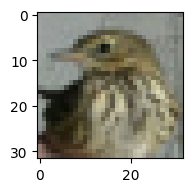

In [7]:
randindices = np.random.randint(50000,size=1)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:], cmap='gray')
# plt.subplot(1,3,2)
# plt.imshow(x_train[randindices[1],:,:], cmap='gray')
# plt.subplot(1,3,3)
# plt.imshow(x_train[randindices[2],:,:], cmap='gray')

**Question 3:** Ecrivez un code qui affiche la classe de l'image sélectionnée précedemment

In [8]:
print(y_train[randindices[0]])

[2]


## Conversion en one-hot encoding

**Question 4:** Faites la conversion des labels y en one-hot encoding

In [9]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[:5,]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Construisons notre ConvNet

**Question 5:** En regardant le model.summary() ci dessous, reconstruisez le code de réseaux de neurones

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
 max_pooling2d (MaxPooling2D)  (None, 14, 14, 32)       0         
 dropout (Dropout)           (None, 14, 14, 32)        0         
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
 max_pooling2d_1 (MaxPooling2D)  (None, 5, 5, 64)         0         
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
 flatten (Flatten)           (None, 1600)              0         
 dense (Dense)               (None, 512)               819712    
 dropout_2 (Dropout)         (None, 512)               0         
 dense_1 (Dense)             (None, 10)                5130      
=================================================================
Total params: 890,410
Trainable params: 890,410
Non-trainable params: 0
_________________________________________________________________
```

(pour les activations utilisez des ReLU et pour le dropout utilisez 30%, la taille des filtres c'est 3x3)

In [10]:
#### ici écrivez le code du convnet
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
### vérifiez si votre model.summary() est similaire à l'énoncé de la question
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

### Normalisation des données d'entrée

**Question 6:** Normalisez les données d'entrées de train et de test

In [12]:
x_train = x_train.astype('float32') #transformation d'int to float
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


### Choix de l'optimiseur et compilation du modèle

**Question 7:** Définisser l'optimiseur ADAM avec un learning rate de $10^{-3}$

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-3)

**Question 8:** Compiler le modèle avec la bonne fonction de coût et afficher aussi la métrique "accuracy"

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

"nvidia-smi" sert à checker la carte GPU utilisée, vérifier que vous avez activer la GPU dans ce colab: onglet "Execution -> modifier le type de l'Execution"

In [15]:
!nvidia-smi

Fri Mar 31 12:11:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |    387MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Entraînement**

[link text](https://)**Question 9:** Entraînez votre modèle, prenez un batch size de 32 et un nombre d'epochs de 20

In [16]:
batch_size = 32
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 [==============================] - 24s 7ms/step - loss: 1.5441 - accuracy: 0.4340 - val_loss: 1.2906 - val_accuracy: 0.5406
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1558 - accuracy: 0.5876 - val_loss: 0.9911 - val_accuracy: 0.6514
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9905 - accuracy: 0.6514 - val_loss: 0.9411 - val_accuracy: 0.6740
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9162 - accuracy: 0.6768 - val_loss: 0.8052 - val_accuracy: 0.7224
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8566 - accuracy: 0.6994 - val_loss: 0.7832 - val_accuracy: 0.7217
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8068 - accuracy: 0.7165 - val_loss: 0.7411 - val_accuracy: 0.7417
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7718 - accuracy: 0.7282 - val_loss: 0.7402 - val_accu

**Question 10:** Affichez les courbes de train loss et val loss

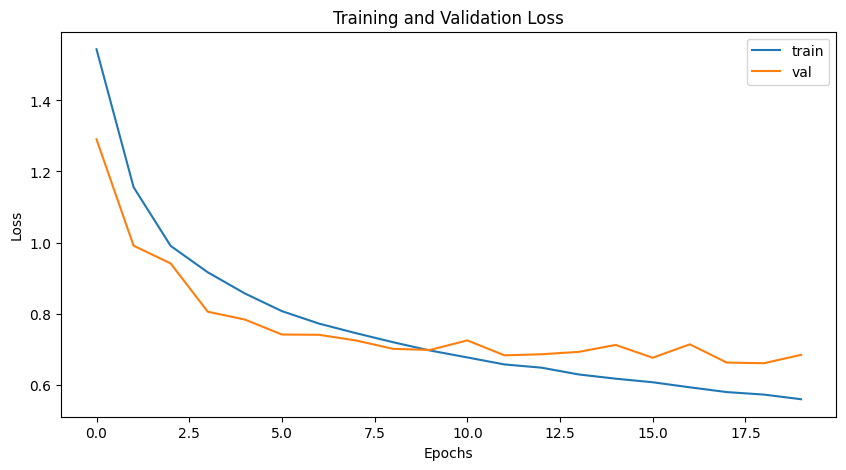

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Score sur le test dataset

**Question 11:** Afficher le score sur les données de test

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.6837436556816101
Test accuracy: 0.7709000110626221


**Question 12**: testez sur un exemple et donnez le numéro de la classe, vérifiez dans le site CIFAR donnée dans l'introduction quelle est le nom de la classe

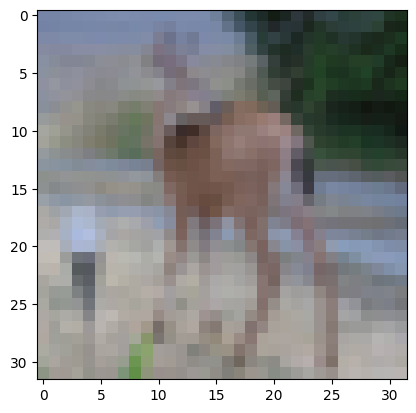

In [19]:
plt.imshow(x_test[100,:,:,:])

In [20]:
# ce code vous donne le numéro de la classe
np.argmax(model.predict(x_test[100,None,:,:,:]))

1/1 [==============================] - 0s 287ms/step


4